# Importing and updating

To use Vaex, python has to be updated and runtime restarted


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install vaex
!pip install --upgrade ipython
!pip install gensim
!pip install tld
!pip install h5py

     |████████████████████████████████| 42 kB 494 kB/s 
     |████████████████████████████████| 108 kB 7.6 MB/s 
     |████████████████████████████████| 3.2 MB 15.3 MB/s 
     |████████████████████████████████| 984 kB 71.2 MB/s 
     |████████████████████████████████| 84 kB 3.7 MB/s 
     |████████████████████████████████| 1.2 MB 73.3 MB/s 
     |████████████████████████████████| 2.9 MB 47.3 MB/s 
     |████████████████████████████████| 3.3 MB 59.0 MB/s 
     |████████████████████████████████| 11.7 MB 44.2 MB/s 
     |████████████████████████████████| 260 kB 75.1 MB/s 
     |████████████████████████████████| 3.4 MB 59.8 MB/s 
     |████████████████████████████████| 2.7 MB 57.6 MB/s 
     |████████████████████████████████| 275 kB 72.6 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 51 kB 682 kB/s 
     |████████████████████████████████| 10.1 MB 48.5 MB/s 
     |████████████████████████████████| 61 kB 266 kB/s 
     |█████████████████

     |████████████████████████████████| 412 kB 4.2 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import vaex
import matplotlib.pyplot as plt
from ast import literal_eval

# Getting trial data

In [ ]:
quotes_2020 = vaex.open('/content/drive/MyDrive/DATA_HDF5/quotes-2020/*.hdf5')

quotes_2019 = vaex.open('/content/drive/MyDrive/DATA_HDF5/quotes-2019/*.hdf5')

In [ ]:
quotes_2020

#,Unnamed: 0,quoteID,quotation,speaker,qids,date,probas,urls,phase,numOccurrences
0,0.0,2020-01-28-000082,'[ D ] espite the efforts of the partners to cre...,None,[],2020-01-28 08:04:05,"""[['None', '0.7272'], ['Prime Minister Netanyahu...","""['http://israelnationalnews.com/News/News.aspx/...",E,--
1,0.0,2020-01-16-000088,'[ Department of Homeland Security ] was livid a...,Sue Myrick,['Q367796'],2020-01-16 12:00:13,"""[['Sue Myrick', '0.8867'], ['None', '0.0992'], ...","""['http://thehill.com/opinion/international/4782...",E,--
2,0.0,2020-02-10-000142,'... He (Madhav) also disclosed that the illegal...,None,[],2020-02-10 23:45:54,"[['None', '0.8926'], ['Prakash Rai', '0.1074']]","""['https://indianexpress.com/article/business/ec...",E,--
3,0.0,2020-02-15-000053,"... [ I ] f it gets to the floor,",None,[],2020-02-15 14:12:51,"[['None', '0.581'], ['Andy Harris', '0.4191']]","""['https://patriotpost.us/opinion/68622-trump-bu...",E,--
4,0.0,2020-01-24-000168,'[ I met them ] when they just turned 4 and 7. T...,Meghan King Edmonds,['Q20684375'],2020-01-24 20:37:09,"""[['Meghan King Edmonds', '0.5446'], ['None', '0...","""['https://people.com/parents/meghan-king-edmond...",E,--
...,...,...,...,...,...,...,...,...,...,...
"5,244,917",0.0,2020-02-24-080186,"""you're seeing a young team that's maturing, tha...",Brendan Whittet,['Q18115465'],2020-02-24 05:00:28,"""[['Brendan Whittet', '0.7077'], ['None', '0.292...","""['http://feeds.browndailyherald.com/~r/BrownDai...",E,1
"5,244,918",0.0,2020-02-07-122251,"""You're talking about African-Americans, right? ...",Barry Michael Cooper,['Q3635235'],2020-02-07 00:00:00,"""[['Barry Michael Cooper', '0.5605'], ['None', '...","""['https://www.villagevoice.com/2020/02/07/1980-...",E,1
"5,244,919",0.0,2020-02-27-098715,"""You've got to own the team. I see Broosky and h...",None,[],2020-02-27 05:59:00,"""[['None', '0.8899'], ['Trent Barrett', '0.0539'...","""['https://www.foxsports.com.au/nrl/nrl-premiers...",E,1
"5,244,920",0.0,2020-02-04-118820,"""You've got to sometimes take that leap of faith...",Brad Gushue,['Q896796'],2020-02-04 14:47:00,"""[['Brad Gushue', '0.706'], ['None', '0.2919'], ...","""['http://timescolonist.com/in-the-rings-steski-...",E,10


In [ ]:
print('There were ' + str(len(quotes_2020)) + ' quotes found in 2020 and ' + str(len(quotes_2019)) + ' in 2019.')

There were 5244922 quotes found in 2020 and 21700001 in 2019.


Clean-up the quotation and count the words. All numbers and signs are removed 

In [ ]:
def remove_from_str(vaex_df, list):
  for i in list:
    vaex_df = vaex_df.str.replace(str(i), "")
  return(vaex_df)

def repl_wh_from_str(vaex_df, list):
  for i in list:
    vaex_df = vaex_df.str.replace(str(i), " ")
  return(vaex_df)

rm_df = remove_from_str(quotes_2020['quotation'], ['[ ', ' ] ', "(", ")", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9",".", ",", ":", ".;", "!", "?", "*", "#", '"', "%", "@", "+", "/", "$"])
rm_df = remove_from_str(rm_df, ["[", "]", "(", ")", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
rpl_df = repl_wh_from_str(rm_df, ["'"])
rpl_df = repl_wh_from_str(rpl_df, ["-", "_", " ", "-"])
only_words_df = rpl_df.str.lower().str.strip(' ')
number_words = only_words_df.str.count(' ') +1

Test weather all signs and white spaces were removed, by making a word 

In [ ]:
def test_true(x, i=0):
  if x == False:
    i = i + 1
  return i

wordslush = only_words_df.str.strip(None)
wordslush = remove_from_str(only_words_df, ' ')

wordslush_bool = wordslush.str.isalpha()

b = wordslush.apply(test_true)
b

df = quotes_2020.copy()
df['chech_q'] = b

Expression = str_replace(str_strip(str_lower(str_replace(str_replace(s...
Length: 5,244,922 dtype: large_string (expression)
--------------------------------------------------
      0  'despitetheeffortsofthepartnerstocreateanonpolit...
      1  'departmentofhomelandsecuritywaslividandstrongly...
      2  'hemadhavalsodisclosedthattheillegalbribeamounti...
      3                                   ifitgetstothefloor
      4  'imetthemwhentheyjustturnedandtheywerelittlethey...
                            ...                             
5244917  'youreseeingayoungteamthatsmaturingthatsmuchmore...
5244918  'youretalkingaboutafricanamericansrightithinkmos...
5244919  'youvegottoowntheteamiseebrooskyandhedoessomegre...
5244920  'youvegottosometimestakethatleapoffaiththatitsgo...
5244921  'youvegottothinkthatlongtermitaugursfairlywellfo...

In [ ]:
df[df.chech_q>0]

#,Unnamed: 0,quoteID,quotation,speaker,qids,date,probas,urls,phase,numOccurrences,chech_q
,,,,,,,,,,,


Now, that we know we only have the words, separated by one whitespace. We can assume the before calculated number of whitespaces +1 (number_words) corresponds to the number of words in each quote

/usr/local/lib/python3.7/dist-packages/vaex/viz/mpl.py:191: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  pylab.tight_layout()


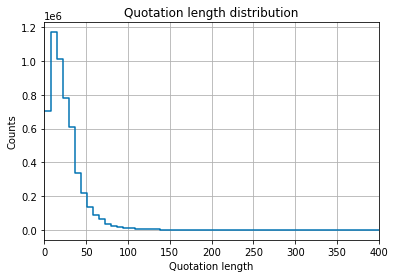

In [ ]:
plt.style.use('seaborn-colorblind')
quotes_2020.viz.histogram(number_words)

plt.xlabel('Quotation length')
plt.ylabel('Counts')
plt.title('Quotation length distribution')
plt.xlim(0,400)
plt.grid(True)
plt.show()